Actors/Actress 
---
How awesome of the makeup work! 


Steps
---
1. get the images of actress/actors in Game of Thrones, [1], saved in folder, "imgs/original";
- split each image into two, after/before makeup, and save it in folder, "imgs/final",
- crop the part of face in each image and save it into folder in "imgs/cvdata".
- use pre-trained features, availed by opercv official site, to recognize whether the image is face of someone or not;
- find similar images


Source
---
1. <a href="http://www.eonline.com/news/871858/game-of-thrones-boss-on-jon-snow-and-daenerys-targaryen-s-complicated-attraction">Game of Thrones</a>

In [1]:
from PIL import Image
import glob, os

import matplotlib.image as mplimg
from skimage.transform import resize, rotate
from skimage.color import rgb2gray,rgb2grey
import numpy as np
import mahotas as mh
import cv2
import dlib
import scipy.misc

import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
files=glob.glob("imgs/original/*.jpg")
for file in files:
    print(file)

imgs/original/rs_1024x759-140320150538-425.2GofT.gleeson.mh.053012.jpg
imgs/original/rs_1024x759-140320150624-425.GofT.aiden.mh.053012.jpg
imgs/original/rs_1024x759-140320150649-425.GofT.carice.mh.053012.jpg
imgs/original/rs_1024x759-140320150707-425.GofT.alfie.mh.053012.jpg
imgs/original/rs_1024x759-140320150727-425.GofT.dinklage.mh.053012.jpg
imgs/original/rs_1024x759-140320150746-425.GofT.christie.mh.053012.jpg
imgs/original/rs_1024x759-140320150836-425.GofT.lena.mh.053012.jpg
imgs/original/rs_1024x759-140320150911-425.GofT.fairley.mh.053012.jpg
imgs/original/rs_1024x759-140320150941-425.GofT.mccann.mh.053012.jpg
imgs/original/rs_1024x759-140320151033-425.GofT.nik.mh.053012.jpg
imgs/original/rs_1024x759-140320151512-425.GofT.maisie.mh.053012.jpg
imgs/original/rs_1024x759-140320152103-425.GofT.emilia.mh.053012_copy.jpg
imgs/original/rs_1024x759-140320152413-1024.kit-harrington-game-of-thrones.ls.32014.jpg
imgs/original/rs_1024x759-140320153046-1024.natalie-dormer-game-of-thrones.ls.3

In [5]:
img = Image.open(files[0])
(width, height)=img.size
print(img.size)

(1024, 759)


In [15]:
xgrid=width//2
ygrid=height

for i in range(len(files)):
    img = Image.open(files[i])
    
    bbox1=(0,0,xgrid,ygrid)
    bbox2=(xgrid,0,2*xgrid,ygrid)
    
    
    slice_bit=img.crop(bbox1)
    slice_bit.save('imgs/final/m_'+str(i)+'_1.jpg', optimize=True, bits=6)
    slice_bit=img.crop(bbox2)
    slice_bit.save('imgs/final/m_'+str(i)+'_2.jpg', optimize=True, bits=6)

In [6]:
import matplotlib.image as mplimg
import matplotlib.pyplot as plt
from skimage.transform import resize, rotate
from skimage.color import rgb2gray,rgb2grey
import numpy as np
import mahotas as mh
import cv2

Trained data fron OpenCV
---
trained classifiers for detecting objects of a particular type, e.g. faces (frontal, profile)
can be found at <a href="https://github.com/opencv/opencv/tree/master/data">OpenCV</a>.

In [22]:

# Create the haar cascade
faceCascade = cv2.CascadeClassifier('classifier/haarcascade_frontalface_default.xml')
faceCascade2 = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [1]:
origdir="imgs/final"
dirname="imgs/cvdata/"
actress='m_13_1.jpg'

Found 1 faces!
Grabbed face picture saved in imgs/cvdata/, (301 px x 301 px), as m_13_1.jpg 


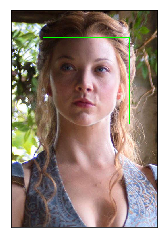

In [23]:
# Read the image
image = cv2.imread('imgs/final/m_13_1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
    #flags = cv2.CV_HAAR_SCALE_IMAGE
)

print("Found {0} faces!".format(len(faces)))

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    faceimage=image[y:y+h,x:x+w]
    cv2.imwrite(dirname+actress,faceimage)
    print("Grabbed face picture saved in %s, (%s px x %s px), as %s " %(dirname,w,h,actress))
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# BGR changed to RGB
b,g,r = cv2.split(image)       # get b,g,r
image_rgb = cv2.merge([r,g,b])     # switch it to rgb


plt.imshow(image_rgb)
plt.xticks([]), plt.yticks([]);

In [24]:
from IPython.display import clear_output

In [84]:
# define picture where located
imgdata="imgs/final"
# object directory to put results
outputimgdir="imgs/cvdata"
# names of defaulted pictures 
imgdir=os.path.join( imgdata,"*.jpg")

img_list = glob.glob(imgdir)

In [27]:
k=np.linspace(0,len(img_list),len(img_list)+1,dtype=int)
k[-1]

70

In [28]:
i,j=0,0;
detectPic,undetectPic=[],[];

for img in img_list:
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30)
    )
    
    if (len(faces)>0):
       detectPic=np.append(detectPic,img)
       clear_output(wait=True)
       #print("Found {0} faces!".format(len(faces)))
       print("%d faces found, %d undetected out" %(i,j)) 
       for (x, y, w, h) in faces:
           faceimage=image[y:y+h,x:x+w]        
           print("Grabbed face picture, (%s px x %s px):" %(w,h))
           resImg=cv2.resize(faceimage,(32,32),interpolation=cv2.INTER_CUBIC)
           cv2.imwrite(outputimgdir+"/"+str(i)+"-1.jpg",resImg)
           #print(outputimgdir+"/"+str(i)+"-1.jpg")
           i=i+1;
    else:
       j=j+1; 
       undetectPic=np.append(undetectPic,img) 

95 faces found, 2 undetected out
Grabbed face picture, (203 px x 203 px):


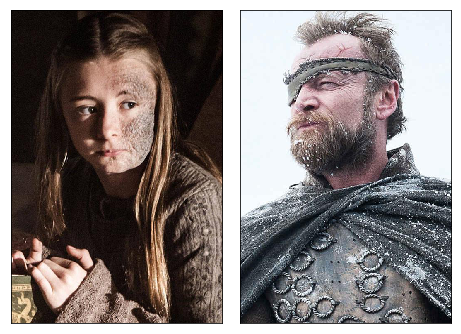

In [30]:
fig = plt.figure(figsize=(16, 12))
i=0
for img in undetectPic:
    image = cv2.imread(img)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(image_rgb)
    ax.set_xticks([]), ax.set_yticks([]);
    i=i+1
plt.tight_layout()  

Computing features from images
===
Mahotas avails submodule named mahotas.features, where feature computation functions are available.

A commonly used set of texture features is the Haralick. As with many methods in image processing, the name is due to its inventor. These features are texture-based: they distinguish between images that are smooth from those that are patterned, and between different patterns.

In [32]:
images = glob.glob('imgs/cvdata/*.jpg')
features = []
labels = []
for im in images:
  labels.append(im[:-len('cvdata/0-1.jpg')])
  im = mh.imread(im)
  im = mh.colors.rgb2gray(im,dtype=np.uint8)
  features.append(mh.features.haralick(im).ravel())

features = np.array(features)
labels = np.array(labels)

array([[  8.14987643e-04,   5.46450605e+02,   9.13537599e-01, ...,
          5.70323282e+00,  -5.28118201e-01,   9.99741856e-01],
       [  8.47505853e-04,   6.45814516e+02,   8.28422066e-01, ...,
          5.78228884e+00,  -4.77525536e-01,   9.99326796e-01],
       [  6.40710360e-04,   1.63683065e+03,   7.01734928e-01, ...,
          6.17836456e+00,  -5.36753229e-01,   9.99798947e-01],
       ..., 
       [  6.20894576e-04,   1.71241835e+03,   7.70228609e-01, ...,
          6.29911255e+00,  -5.36118550e-01,   9.99808948e-01],
       [  6.77801444e-04,   1.76555040e+03,   7.93355788e-01, ...,
          6.27725204e+00,  -5.47120450e-01,   9.99840203e-01],
       [  4.67455964e-04,   5.48115836e+01,   9.94176203e-01, ...,
          4.02012516e+00,  -3.94903648e-01,   9.98877116e-01]])

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation

In [37]:
clf = Pipeline([('preproc', StandardScaler()),
                ('classifier', LogisticRegression())])

#from sklearn import cross_validation
cv = cross_validation.LeaveOneOut(len(images))
scores = cross_validation.cross_val_score(clf, features, labels, cv=cv)
print('Accuracy: {:.1%}'.format(scores.mean()))

Accuracy: 86.6%


In [45]:
# assign the name in img_list
imgarray=[""]*len(images)
i=0
for fn in images:
    imgarray[i]=fn
    i=i+1   

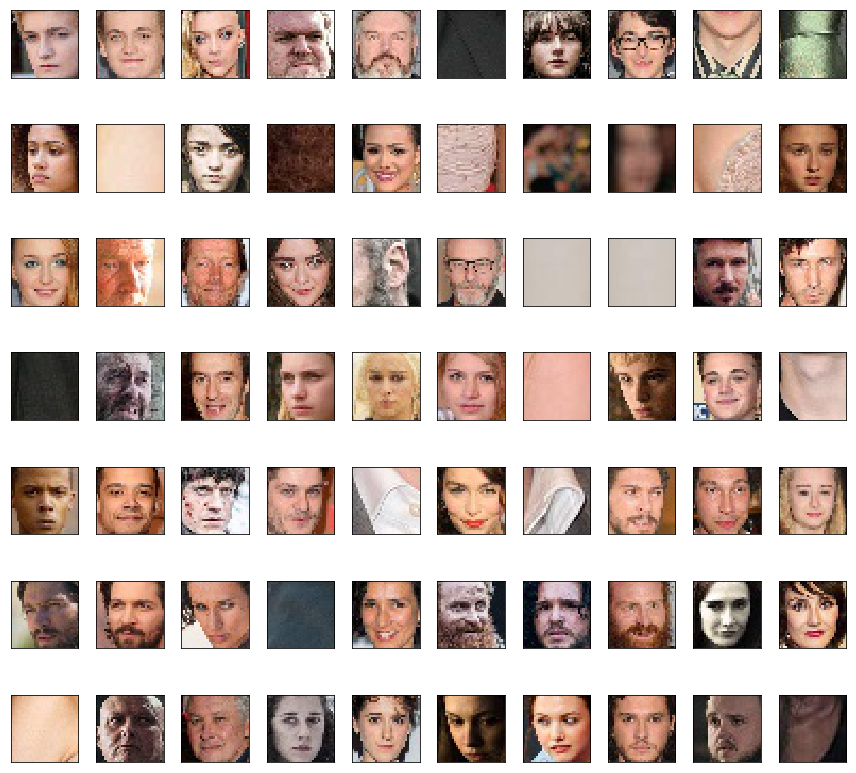

In [48]:
fig = plt.figure(figsize=(12, 16))
# list all images
for i in range(len(img_list)):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(mh.imread(imgarray[i]), cmap=plt.cm.gray)
plt.tight_layout()  

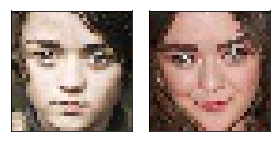

In [56]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
ax.imshow(mh.imread("imgs/cvdata/2-1.jpg"), cmap=plt.cm.gray)
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
ax.imshow(mh.imread("imgs/cvdata/3-1.jpg"), cmap=plt.cm.gray)
plt.tight_layout()  

In [62]:

# import the necessary packages
from skimage.measure import compare_ssim
import imutils

In [58]:
# load the two input images
imageA = cv2.imread("imgs/cvdata/2-1.jpg")
imageB = cv2.imread("imgs/cvdata/3-1.jpg")
 
# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)


In [59]:
# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.3987405283362146


1. Using the compare_ssim  function from scikit-image, we calculate a score  and difference image, diff  (Line 1).
- The score  represents the structural similarity index between the two input images. This value can fall into the range [-1, 1] with a value of one being a “perfect match”.
- The diff  image contains the actual image differences between the two input images that we wish to visualize. The difference image is currently represented as a floating point data type in the range [0, 1] so we first convert the array to 8-bit unsigned integers in the range [0, 255] (Line 2) before we can further process it using OpenCV.

Now, let’s find the contours so that we can place rectangles around the regions identified as “different”:

In [63]:
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]

- On [Line 1] we threshold our diff  image using both cv2.THRESH_BINARY_INV  and cv2.THRESH_OTSU ,both of these settings are applied at the same time using the vertical bar ‘or’ symbol, | . For details on Otsu’s bimodal thresholding setting, see this OpenCV documentation.
- Subsequently we find the contours of thresh  on Lines 2. The ternary operator on Line 2 simply accommodates difference between the cv2.findContours return signature in OpenCV 2.4 and OpenCV 3, respectively.

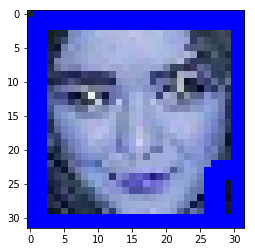

In [71]:
for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
# show the output images
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
plt.imshow(imageA)
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
plt.imshow(imageB)
#plt.imshow(diff)
#plt.imshow(thresh)

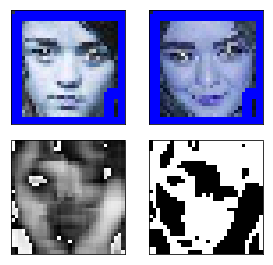

In [76]:
fig = plt.figure(figsize=(4, 8))
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
ax.imshow(imageA, cmap=plt.cm.gray)
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
ax.imshow(imageB, cmap=plt.cm.gray)
ax = fig.add_subplot(2, 2, 3, xticks=[], yticks=[])
ax.imshow(diff, cmap=plt.cm.gray)
ax = fig.add_subplot(2, 2, 4, xticks=[], yticks=[])
ax.imshow(thresh, cmap=plt.cm.gray)

plt.tight_layout()

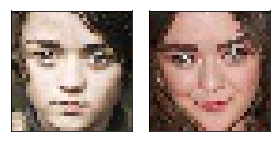

In [56]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
ax.imshow(mh.imread("imgs/cvdata/2-1.jpg"), cmap=plt.cm.gray)
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
ax.imshow(mh.imread("imgs/cvdata/3-1.jpg"), cmap=plt.cm.gray)
plt.tight_layout()  

A image hashing library written in Python. ImageHash supports:
---
```
average hashing (aHash)
perception hashing (pHash)
difference hashing (dHash)
wavelet hashing (wHash)
```

In [111]:
import imagehash,PIL,six

In [114]:
import sys, os, imagehash

def find_similar_images(userpath, hashfunc = imagehash.average_hash):
    import os
    def is_image(filename):
        f = filename.lower()
        return f.endswith(".png") or f.endswith(".jpg") or \
            f.endswith(".jpeg") or f.endswith(".bmp") or f.endswith(".gif")
    
    image_filenames = [os.path.join(userpath, path) for path in os.listdir(userpath) if is_image(path)]
    images = {}
    for img in sorted(image_filenames):
        #print(img)
        hash = hashfunc(PIL.Image.open(img))
        images[hash] = images.get(hash, []) + [img]
    
    for k, img_list in six.iteritems(images):
        if len(img_list) > 1:
            print(" ".join(img_list))

In [116]:
hashmethod='ahash'
imgdir="imgs/cvdata"
find_similar_images(userpath=imgdir)

imgs/cvdata/0-1-Copy1.jpg imgs/cvdata/0-1.jpg


Face Recognition not detection
---
Link: <a href="https://github.com/ageitgey">Adam Geitgey site</a>, face_recognition and face_recognition_models. 

<a href="https://medium.com/towards-data-science/facial-recognition-using-deep-learning-a74e9059a150">Facial Recognition Using Deep Learning</a>

1. we will be taking:
Detect/identify faces in an image (using a face detection model) — for simplicity, this tutorial will only use images with one face/person in it, not more/less
- Predict face poses/landmarks (for the faces identified in step 1)
- Using data from step 2 and the actual image, calculate face encodings (numbers that describe the face)
- Compare the face encodings of known faces with those from test images to tell who is in the picture


dlib
---
compi;er: ```python setup.py install --no DLIB_USE_CUDA```

Check the version of X11-dev, \$anaconda/include/X11 and /usr/include/X11. 

Pre-trained Data
---
1. <a href="http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2">dlib_face_recognition_resnet_model_v1.dat.bz2</a>
- <a href="http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2">shape_predictor_68_face_landmarks.dat.bz2</a>

Initialize and Setup
---
Here we import the required library and set up the objects/parameters needed for our face recognition.

In [3]:
# Get Face Detector from dlib
# This allows us to detect faces in images
face_detector = dlib.get_frontal_face_detector()
# Get Pose Predictor from dlib
# This allows us to detect landmark points in faces and understand the pose/angle of the face
shape_predictor = dlib.shape_predictor('classifier/shape_predictor_68_face_landmarks.dat')
# Get the face recognition model
# This is what gives us the face encodings (numbers that identify the face of a particular person)
face_recognition_model = dlib.face_recognition_model_v1('classifier/dlib_face_recognition_resnet_model_v1.dat')
# This is the tolerance for face comparisons
# The lower the number - the stricter the comparison
# To avoid false matches, use lower value
# To avoid false negatives (i.e. faces of the same person doesn't match), use higher value
# 0.5-0.6 works well
TOLERANCE = 0.6


Get face encodings from an image 
---
Here we are writing the function that will take an image filename and give us the face encodings for that image.


In [4]:
# This function will take an image and return its face encodings using the neural network
def get_face_encodings(path_to_image):
    # Load image using scipy
    image = scipy.misc.imread(path_to_image)
    # Detect faces using the face detector
    detected_faces = face_detector(image, 1)
    # Get pose/landmarks of those faces
    # Will be used as an input to the function that computes face encodings
    # This allows the neural network to be able to produce similar numbers for faces of the same people, regardless of camera angle and/or face positioning in the image
    shapes_faces = [shape_predictor(image, face) for face in detected_faces]
    # For every face detected, compute the face encodings
    return [np.array(face_recognition_model.compute_face_descriptor(image, face_pose, 1)) for face_pose in shapes_faces]


Compare faces 
---
Here we are writing the function that will compare a given face encoding with a list of known face encodings. It will return an array of boolean (**True/False**) values that indicate whether or not there was a match.


In [5]:
# This function takes a list of known faces
def compare_face_encodings(known_faces, face):
    # Finds the difference between each known face and the given face (that we are comparing)
    # Calculate norm for the differences with each known face
    # Return an array with True/Face values based on whether or not a known face matched with the given face
    # A match occurs when the (norm) difference between a known face and the given face is less than or equal to the TOLERANCE value
    return (np.linalg.norm(known_faces - face, axis=1) <= TOLERANCE)

Find match 
---
Here we are writing the function that will take a list of known face encodings, list of names of people (corresponding to the list of known face encodings) and a face to find a match for. It will call the function in 3a and return the name of the person with whom the given face matches.


Getting face encodings 
---
for all faces in the images folder, "imgs/svdata":

In [7]:
# Get path to all the known images
# Filtering on .jpg extension - so this will only work with JPEG images ending with .jpg

image_filenames = filter(lambda x: x.endswith('.jpg'), os.listdir('imgs/final'))
# Sort in alphabetical order
image_filenames = sorted(image_filenames)
# Get full paths to images
paths_to_images = ['imgs/final/' + x for x in image_filenames]

In [8]:
paths_to_images[:3]

['imgs/final/m_0_1.jpg', 'imgs/final/m_0_2.jpg', 'imgs/final/m_10_1.jpg']

In [35]:
# List of face encodings we have
face_encodings = []
# Loop over images to get the encoding one by one
known_imgs=[]
for path_to_image in paths_to_images:
    # Get face encodings from the image
    face_encodings_in_image = get_face_encodings(path_to_image)
    # Make sure there's exactly one face in the image
    if len(face_encodings_in_image) != 1:
        print(path_to_image+": no face found!\n")
        #print("Please change image: " + path_to_image + " - it has " + str(len(face_encodings_in_image)) + " faces; it can only have one")
        #exit()
    else:   
        # Append the face encoding found in that image to the list of face encodings we have
        known_imgs.append(path_to_image)
        face_encodings.append(get_face_encodings(path_to_image)[0])

imgs/final/m_18_1.jpg: no face found!

imgs/final/m_30_1.jpg: no face found!

imgs/final/m_34_1.jpg: no face found!

imgs/final/m_4_1.jpg: no face found!



Matching each image in test folder with the known faces (one by one)


In [36]:
len(face_encodings)

66

In [37]:
 known_imgs

['imgs/final/m_0_1.jpg',
 'imgs/final/m_0_2.jpg',
 'imgs/final/m_10_1.jpg',
 'imgs/final/m_10_2.jpg',
 'imgs/final/m_11_1.jpg',
 'imgs/final/m_11_2.jpg',
 'imgs/final/m_12_1.jpg',
 'imgs/final/m_12_2.jpg',
 'imgs/final/m_13_1.jpg',
 'imgs/final/m_13_2.jpg',
 'imgs/final/m_14_1.jpg',
 'imgs/final/m_14_2.jpg',
 'imgs/final/m_15_1.jpg',
 'imgs/final/m_15_2.jpg',
 'imgs/final/m_16_1.jpg',
 'imgs/final/m_16_2.jpg',
 'imgs/final/m_17_1.jpg',
 'imgs/final/m_17_2.jpg',
 'imgs/final/m_18_2.jpg',
 'imgs/final/m_19_1.jpg',
 'imgs/final/m_19_2.jpg',
 'imgs/final/m_1_1.jpg',
 'imgs/final/m_1_2.jpg',
 'imgs/final/m_20_1.jpg',
 'imgs/final/m_20_2.jpg',
 'imgs/final/m_21_1.jpg',
 'imgs/final/m_21_2.jpg',
 'imgs/final/m_22_1.jpg',
 'imgs/final/m_22_2.jpg',
 'imgs/final/m_23_1.jpg',
 'imgs/final/m_23_2.jpg',
 'imgs/final/m_24_1.jpg',
 'imgs/final/m_24_2.jpg',
 'imgs/final/m_25_1.jpg',
 'imgs/final/m_25_2.jpg',
 'imgs/final/m_26_1.jpg',
 'imgs/final/m_26_2.jpg',
 'imgs/final/m_27_1.jpg',
 'imgs/final/m_2

In [13]:
# Get path to all the test images
# Filtering on .jpg extension - so this will only work with JPEG images ending with .jpg
test_filenames = filter(lambda x: x.endswith('.jpg'), os.listdir('imgs/test/'))
# Get full paths to test images
paths_to_test_images = ['imgs/test/' + x for x in test_filenames]
# Get list of names of people by eliminating the .JPG extension from image filenames
names = [x[:-4] for x in image_filenames]
# Iterate over test images to find match one by one
for path_to_image in paths_to_test_images:
    # Get face encodings from the test image
    face_encodings_in_image = get_face_encodings(path_to_image)
    # Make sure there's exactly one face in the image
    if len(face_encodings_in_image) != 1:
        print("Please change image: " + path_to_image + " - it has " + str(len(face_encodings_in_image)) + " faces; it can only have one")
        exit()
    # Find match for the face encoding found in this test image
    match = find_match(face_encodings, names, face_encodings_in_image[0])
    # Print the path of test image and the corresponding match
    print(path_to_image, match)

imgs/test/target.jpg 1-1


In [26]:
# Get path to all the known images
# Filtering on .jpg extension - so this will only work with JPEG images ending with .jpg
image_filenames = filter(lambda x: x.endswith('.jpg'), os.listdir('imgs/final'))
# Sort in alphabetical order
image_filenames = sorted(image_filenames)
# Get full paths to images
paths_to_images = ['imgs/final/' + x for x in image_filenames]

In [89]:
# Get path to all the known images
# Filtering on .jpg extension - so this will only work with JPEG images ending with .jpg
image_filenames = filter(lambda x: x.endswith('.jpg'), os.listdir('imgs/final'))
# Sort in alphabetical order
image_filenames = sorted(image_filenames)
# Get full paths to images
paths_to_images = ['imgs/final/' + x for x in image_filenames]
# List of face encodings we have
face_encodings = []
# Loop over images to get the encoding one by one
for path_to_image in paths_to_images:
    # Get face encodings from the image
    face_encodings_in_image = get_face_encodings(path_to_image)
    # Make sure there's exactly one face in the image
    if len(face_encodings_in_image) != 1:
        print("Please change image: " + path_to_image + " - it has " + str(len(face_encodings_in_image)) + " faces; it can only have one")
        #exit()
    else:
        # Append the face encoding found in that image to the list of face encodings we have
        face_encodings.append(get_face_encodings(path_to_image)[0])

Please change image: imgs/final/m_18_1.jpg - it has 0 faces; it can only have one
Please change image: imgs/final/m_30_1.jpg - it has 0 faces; it can only have one
Please change image: imgs/final/m_34_1.jpg - it has 0 faces; it can only have one
Please change image: imgs/final/m_4_1.jpg - it has 0 faces; it can only have one


In [93]:
len(face_encodings)

66

In [68]:
# Get path to all the test images
# Filtering on .jpg extension - so this will only work with JPEG images ending with .jpg
test_filenames = filter(lambda x: x.endswith('.jpg'), os.listdir('imgs/test/'))
# Get full paths to test images
paths_to_test_images = ['imgs/test/' + x for x in test_filenames]
# Get list of names of people by eliminating the .JPG extension from image filenames
#names = [x[:-4] for x in image_filenames]
names = [x[:-4] for x in known_imgs]

target=[]
dataset=[]

# Iterate over test images to find match one by one
for path_to_image in paths_to_test_images:
    # Get face encodings from the test image
    face_encodings_in_image = get_face_encodings(path_to_image)
    # Make sure there's exactly one face in the image
    if len(face_encodings_in_image) != 1:
        print("Please change image: " + path_to_image + " - it has " + str(len(face_encodings_in_image)) + " faces; it can only have one")
        #exit()
    # Find match for the face encoding found in this test image
    else:
        dataset.append(path_to_image)
        match = find_match(face_encodings, names, face_encodings_in_image[0])
        # Print the path of test image and the corresponding match
        target.append(match+".jpg")
        print("target: ",path_to_image, ", known image: ", match)

target:  imgs/test/target0.jpg , known image:  imgs/final/m_0_1
target:  imgs/test/target10.jpg , known image:  imgs/final/m_10_1
target:  imgs/test/target10_2.jpg , known image:  imgs/final/m_10_1
target:  imgs/test/target11_2.jpg , known image:  imgs/final/m_11_1
target:  imgs/test/target12.jpg , known image:  imgs/final/m_6_1
target:  imgs/test/target3.jpg , known image:  imgs/final/m_15_1


let us look at the recognition result:

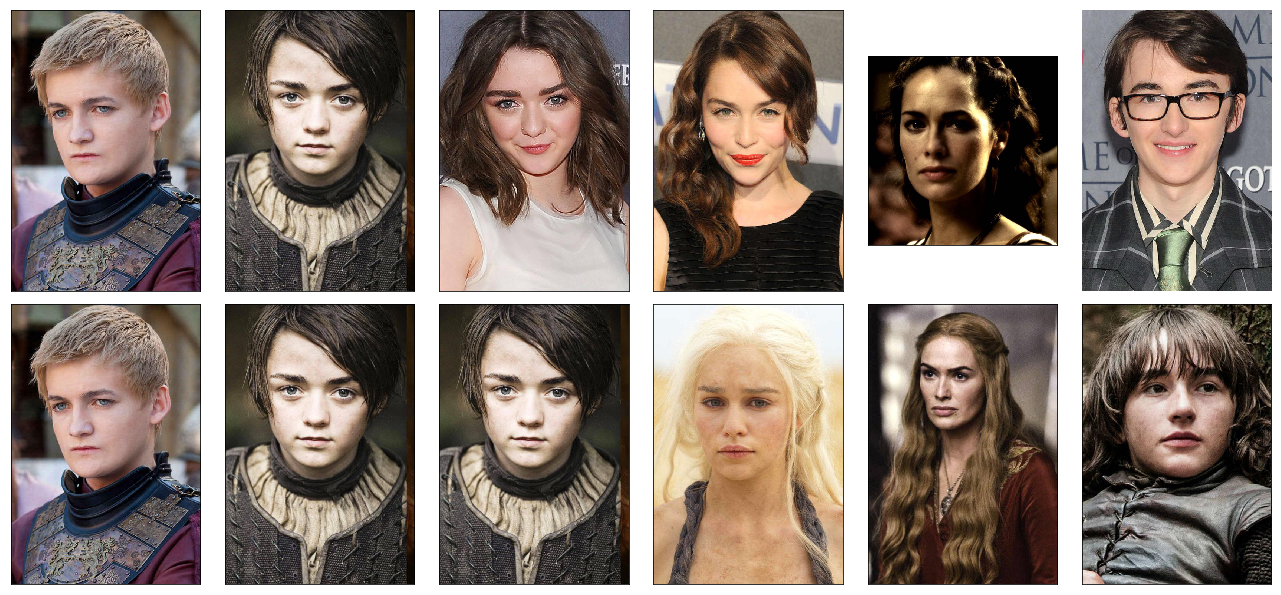

In [66]:
fig= plt.figure(figsize=(3*len(target), 18))
for i in range(len(target)):
    ax = fig.add_subplot(1, len(target), i+1, xticks=[], yticks=[])
    ax.imshow(mh.imread(target[i]), cmap=plt.cm.gray)
 
for i in range(len(target)):
    ax = fig.add_subplot(2, len(target), i+1, xticks=[], yticks=[])
    ax.imshow(mh.imread(dataset[i]), cmap=plt.cm.gray)   
plt.axis("off")    
plt.tight_layout()      

Not bad for this test, right? Especially the fourth comparion, the dragon Queen. 

In [22]:
import face_recognition
known_image = face_recognition.load_image_file("imgs/final/m_6_1.jpg")
unknown_image = face_recognition.load_image_file("imgs/test/target3.jpg")

known_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

results = face_recognition.compare_faces([know_encoding], unknown_encoding)
results

[True]